In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from sklearn.preprocessing import OneHotEncoder

In [4]:
df =  pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [26]:
df[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count() 

,Survived
Pclass,
1,216
2,184
3,491


In [27]:
df[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum() 

,Survived
Pclass,
1,136
2,87
3,119


In [28]:
df[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


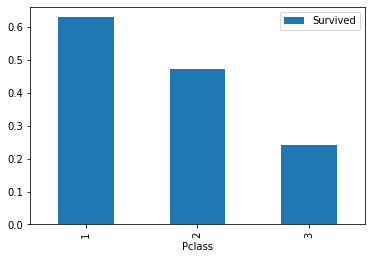

In [29]:
df[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar() 

## mission 01 
'''
- 캐글 타이타닉 호칭추출/ 호칭별 건수추출/ 소트하기/ 상위10개 호칭 조사
- 나이(age)로 구간화시키기/ 구간별 건수확인/ 소트하여 출력
'''

In [31]:
df['Name'].map(lambda x : x.split(',')[1].split('.')[0].strip())

IndexError: list index out of range

In [30]:
df['Name'] = df['Name'].map(lambda x : x.split(',')[1].split('.')[0].strip())
df['Name']

IndexError: list index out of range

In [18]:
# df['Name'].map(lambda x : x.split(',')[1].split(',')[0].strip())
# df['Name'].value_counts()
# df['Name'].value_counts(sort=True) # 호칭 소트
# df['Name'].value_counts(sort=True).head(10)
# df['Name'].value_counts(sort=True)[:10]

IndexError: list index out of range

In [25]:
df['Name'].str.extract(r',([a-zA-Z\s]+).')

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [50]:
titan_age = df['Age'].value_counts(sort=False, bins=[0,10,20,30,40,50,60,70,80,90,100])
titan_age  # 나이별 구간화 하여 건수 확인

(-0.001, 10.0]     64
(10.0, 20.0]      115
(20.0, 30.0]      230
(30.0, 40.0]      155
(40.0, 50.0]       86
(50.0, 60.0]       42
(60.0, 70.0]       17
(70.0, 80.0]        5
(80.0, 90.0]        0
(90.0, 100.0]       0
Name: Age, dtype: int64

In [51]:
df['Sex'].replace(['male','female'],[0,1])

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    1
864    0
865    1
866    1
867    0
868    0
869    0
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    1
883    0
884    0
885    1
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [127]:
from numpy import *
kakao = pd.read_csv("kakao.csv", index_col=0)
kakao
# new_kakao = kakao([:],[1:])
# print(new_kakao)
kakao_mean = mean(kakao, axis=0)
kakao_mean
std_kakao = ( kakao-mean(kakao,axis=0) ) / std(kakao,axis=0)
print(std_kakao)
nmz_kakao = ( kakao - kakao.min(axis=0)) / ( kakao.max(axis=0) - kakao.min(axis=0))
print(nmz_kakao)

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2019-06-03 -0.491177 -0.378968 -0.356293 -0.682353  -0.682353 -0.631881
2019-06-04 -0.749044 -0.757937 -1.705533 -1.436534  -1.436534  1.756715
2019-06-05 -1.135846 -1.389551 -0.969584 -1.185140  -1.185140 -0.669486
2019-06-07 -1.393714 -1.642196 -1.460217 -1.310837  -1.310837  0.361598
2019-06-10 -1.393714 -0.505291 -1.092242 -0.305263  -0.305263  0.225866
2019-06-11 -0.362243 -0.505291 -0.233635 -0.179567  -0.179567 -0.954163
2019-06-12 -0.233309 -0.505291 -0.233635 -0.305263  -0.305263 -1.096508
2019-06-13 -0.362243  0.126323  0.011682  0.323220   0.323220  1.306110
2019-06-14  0.411360  0.252646  0.256998 -0.053870  -0.053870 -0.446486
2019-06-17 -0.104375 -0.505291 -0.601609 -0.933747  -0.933747 -0.480802
2019-06-18 -1.006912 -1.010582 -0.846926 -1.059443  -1.059443 -0.505759
2019-06-19 -0.749044 -1.136905 -0.601609 -0.808050  -0.808050 -1

## mission 02 

In [8]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
df['Age'].isna().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [12]:
df['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
18     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
       ... 
856    45.0
857    51.0
858    24.0
860    41.0
861    21.0
862    48.0
864    24.0
865    42.0
866    27.0
867    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df.groupby('Pclass')['Survived'].sum()
pd.crosstab(df['Pclass'],df['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [21]:
df.groupby('Embarked')['Survived'].sum()
pd.crosstab(df['Embarked'],df['Survived'],margins=True).style.background_gradient(cmap='Blues')

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


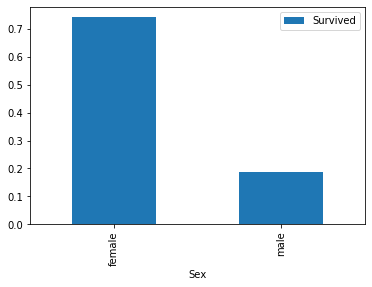

In [23]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  import sys


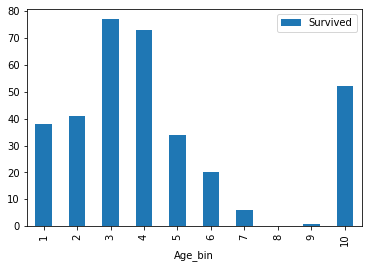

In [45]:
bins = np.linspace(0,90,10)
df['Age_bin'] = np.digitize(df["Age"],bins)
df
df.groupby('Age_bin').sum()
bins
df[df["Age"]> 60][['Age','Age_bin']]
df[['Age_bin', 'Survived']].groupby(['Age_bin'], as_index=True).sum().sort_index(by='Age_bin', ascending=True).plot.bar()

In [46]:
df['Age'].max()
df['Age'].min()

0.42

In [47]:
bins = np.linspace(df['Age'].min(),df['Age'].max(),8)
df['Age_bin'] = np.digitize(df["Age"],bins)
df.groupby('Age_bin').sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_int,Sex_Toint,Ebk_Toint
Age_bin,,,,,,,,,,
1,29712,39,179,317.17,128,97,2164.7666,32,32,112
2,76465,64,447,3411.00,76,54,5202.3084,69,69,283
3,107230,93,545,6652.50,82,55,6256.3829,79,79,378
4,58639,56,268,5279.50,48,74,6602.0582,51,51,218
5,34438,28,108,3444.50,26,17,2925.9419,23,23,101
6,10194,9,38,1594.00,5,10,1409.2416,7,7,39
7,2979,0,11,426.50,1,1,181.1834,0,0,7
8,77729,53,461,80.00,100,32,3952.0663,53,53,231


{'whiskers': [<matplotlib.lines.Line2D at 0x17fa1fbdc18>,
 'caps': [<matplotlib.lines.Line2D at 0x17fa19aa518>,
 'boxes': [<matplotlib.lines.Line2D at 0x17fa1fbdc50>],
 'medians': [<matplotlib.lines.Line2D at 0x17fa19aa978>],
 'fliers': [<matplotlib.lines.Line2D at 0x17fa19c4b70>],
 'means': []}

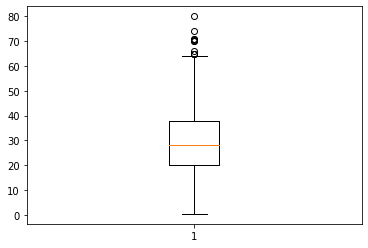

In [48]:
df[df['Age'].notna()]
plt.boxplot(df[df['Age'].notna()]['Age'])

In [49]:
p = re.compile("([A-Z][a-z]+)[.]") # title을 추출하는 pattern
df["title"] = df["Name"].str.findall(p).str[0]
df[["Name", "title"]]

,Name,title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
5,"Moran, Mr. James",Mr
6,"McCarthy, Mr. Timothy J",Mr
7,"Palsson, Master. Gosta Leonard",Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs


In [11]:
df["title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Ms            1
Don           1
Jonkheer      1
Lady          1
Mme           1
Sir           1
Countess      1
Capt          1
Name: title, dtype: int64

In [12]:
tempTitle = np.unique(df["title"]) #,return_counts=True
tempTitle

array(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady',
       'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev',
       'Sir'], dtype=object)

In [13]:
tempIdx = np.array([ i for i in range(len(tempTitle))]).reshape(-1, 1) # reshape(-1,1)로 ohe이 fit할 수 있는 형태로 변환
tempIdx

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16]])

In [14]:
ohe = OneHotEncoder()
ohe.fit(tempIdx)
ohe.n_values_

test = np.array([[13],
                [12]])
ohe.transform(test).toarray()

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``n_values_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0.]])

In [15]:
tempOhe = ohe.transform(tempIdx).toarray()
# tempOhe.shape, tempTitle.reshape(17,1)
# type(tempTitle)
# tempTitle.col
tempTitle = pd.Series(tempTitle, name="title")
# tempTitle.rename('title')
tempTitle

0         Capt
1          Col
2     Countess
3          Don
4           Dr
5     Jonkheer
6         Lady
7        Major
8       Master
9         Miss
10        Mlle
11         Mme
12          Mr
13         Mrs
14          Ms
15         Rev
16         Sir
Name: title, dtype: object

In [27]:
alpha = df["title"]
for i in range(tempTitle.shape[0]):
    alpha = np.where(df["title"] == tempTitle[i], i, alpha)
    
alpha

tempOhe = ohe.transform(alpha.reshape(-1,1)).toarray()

tempOhe

# tempTitle = pd.Series(tempTitle, name="title")

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
tempDf = pd.concat([df["title"], pd.DataFrame(tempOhe)], axis = 1)
tempDf

,title,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Mr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Mrs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mrs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Mr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Mr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,Mr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,Master,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Mrs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,Mrs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
# df.join(tempDf,on='title')
# df.join(tempTitle, lsuffix='title', rsuffix='title')
# pd.merge(df,tempTitle,on='title')
pd.concat([df,tempDf],join='inner',axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,7,8,9,10,11,12,13,14,15,16
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
pd.get_dummies(df['title'])

,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## mission03 

- Visualization mission 
- pclass/ sex/ cabin/ embarked/ parch 와  survival
- age 구간화해서 survival


In [24]:
df.head(10)
df.columns

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

#### 각 칼럼별 survived와 관련 정도를 piechart로 구현

Pclass      -0.338481
Sex_Toint    0.543351
Ebk_Toint   -0.167675
Parch        0.081629
Name: Survived, dtype: float64

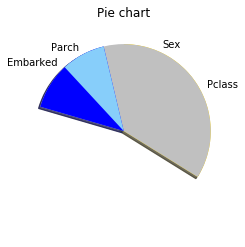

In [41]:
#1. 범주형 데이터의 수치화(상관계수 구하려면 변환필요)
df['Sex_Toint'] = np.where(df['Sex']=='male',0,1)
df['Sex_Toint']
df['Ebk_Toint'] = np.where(df['Embarked']=='C',0, np.where(df['Embarked']=='Q',1,2))
df['Ebk_Toint']

# df['Cabin_Toint'] = np.where(df['Cabin']=='male',0,1)
# df['Cabin_Toint']

#2. 상관계수만 저장된 리스트 만듬
df_corr = df[['Survived','Pclass','Sex_Toint','Ebk_Toint','Parch']].corr(method='pearson')
corr_list=df_corr.iloc[0,1:]
corr_list

new_corr_list = 

#3. pie 그래프 생성
labels = ['Pclass','Sex','Embarked','Parch']
colors = ['gold','silver','blue', 'lightskyblue']
sizes = corr_list # 각 칼럼과 survived에 대한 관련성을 어떻게 수치화???
len(sizes)
# explode=(0,0,0.1,0)
plt.title('Pie chart')
plt.pie(sizes, labels=labels, 
        colors=colors, startangle=90, shadow=True) 

corr_list

#### Age를 구간화하여 survived를 구해보자

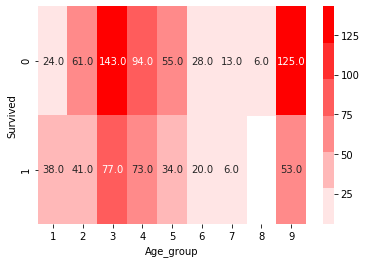

In [91]:
bins = np.linspace(df['Age'].min(), df['Age'].max(), 9, dtype='int32') # --> 구간 뒷부분 폐구간이므로 9구간으로
bins
df['Age_group'] = np.digitize(df['Age'], bins)
df['Age_group']

Age_survv = df.pivot_table(
    index =  'Survived',
    columns =  'Age_group',
    aggfunc = 'size',
     )#fill_value= '0'

Age_survv
sns.heatmap(Age_survv, annot=True, fmt='.1f', cmap=sns.light_palette('red'))